In [1]:
import matplotlib.pyplot as plt
import pandas
from genotype_db import GenotypeDB
from phenotype_framework import PhenotypeFramework
from revolve2.core.database import open_database_sqlite
from revolve2.core.optimization import DbId
from revolve2.genotypes.cppnwin.genotype_schema import DbGenotype
from revolve2.core.optimization.ea.generic_ea import (
    DbEAOptimizer,
    DbEAOptimizerGeneration,
    DbEAOptimizerIndividual,
)
from sqlalchemy.future import select

In [2]:
database: str = "/home/oliver/revolve2/examples/optimize_modular/database"
db_id: DbId = DbId("optmodular")

# open the database
db = open_database_sqlite(database)
# read the optimizer data into a pandas dataframe

df = pandas.read_sql(
    select(
        DbEAOptimizer,
        DbEAOptimizerGeneration,
        DbEAOptimizerIndividual,
        DbGenotype,
        GenotypeDB

    ).filter(
        (DbEAOptimizer.db_id == db_id.fullname)
        & (DbEAOptimizerGeneration.ea_optimizer_id == DbEAOptimizer.id)
        & (DbEAOptimizerIndividual.ea_optimizer_id == DbEAOptimizer.id)
        & (DbEAOptimizerIndividual.genotype_id == GenotypeDB.id)
        & (GenotypeDB.body_id == DbGenotype.id)
        & (
            DbEAOptimizerGeneration.individual_id
            == DbEAOptimizerIndividual.individual_id
        )
    ),
    db,
)

In [3]:
df["blocks"], df["hinges"] = zip(*df.serialized_multineat_genome.apply(PhenotypeFramework.get_blocks_hinges_amount))

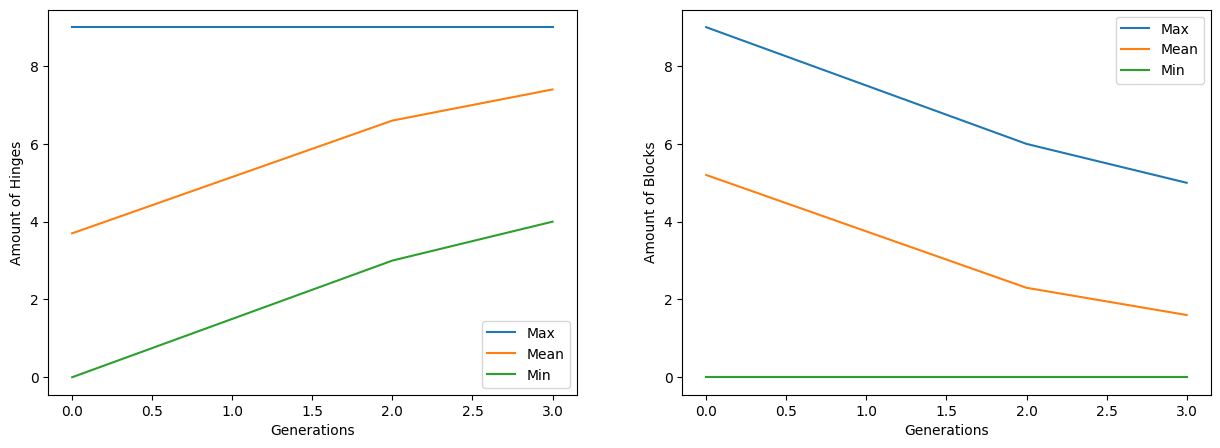

In [20]:
# calculate max min avg
hngs = (
    df[["generation_index", "hinges"]]
    .groupby(by="generation_index")
    .describe()["hinges"]
)

blcks = (
    df[["generation_index", "blocks"]]
    .groupby(by="generation_index")
    .describe()["blocks"]
)



fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))

ax1.set_xlabel("Generations")
ax1.set_ylabel("Amount of Hinges")
ax1.plot(hngs[["max", "mean", "min"]], label= ["Max", "Mean", "Min"])
ax1.legend()

ax2.set_xlabel("Generations")
ax2.set_ylabel("Amount of Blocks")
ax2.plot(blcks[["max","mean","min"]], label= ["Max", "Mean", "Min"])
ax2.legend()